In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wrds
pd.options.display.max_columns=200

### Connect WRDS

In [2]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


In [53]:
uber_cik= '0001543151'

------

### Compustat - Company

In [52]:
company= conn.raw_sql(f"""select *
                    from comp.company a
                    where a.cik = '{uber_cik}'
                    """)
print(company.shape)
company.head()

(1, 39)


,conm,gvkey,add1,add2,add3,add4,addzip,busdesc,cik,city,conml,costat,county,dlrsn,ein,fax,fic,fyrc,ggroup,gind,gsector,gsubind,idbflag,incorp,loc,naics,phone,prican,prirow,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
0,UBER TECHNOLOGIES INC,035077,1515 3rd Street,None,None,None,94158,"Uber Technologies, Inc. develops and operates ...",0001543151,San Francisco,Uber Technologies Inc,A,None,None,45-2647441,None,USA,12.0,2030,203040,20,20304020,D,DE,USA,485310,415 612 8582,None,None,01,4100,None,None,None,CA,0.0,www.uber.com,None,2019-05-10


In [40]:
vars_to_print= ['gvkey', 'cik', 'conm', 'city', 'state', 'sic', 'ipodate']
for var in vars_to_print:
    print(f"{var:<10}: {company.loc[0,var]}")

gvkey     : 035077
cik       : 0001543151
conm      : UBER TECHNOLOGIES INC
city      : San Francisco
state     : CA
sic       : 4100
ipodate   : 2019-05-10


In [41]:
gvkey= company.loc[0, 'gvkey']

### Compustat - Funda

In [42]:
dfa= conn.raw_sql(f"""select conm, gvkey, cik, fyear, at, lt, sale, ni, ib, oancf, prcc_f*csho as mv
                    from comp.funda a
                    where a.fyear >= 1990 and 
                        a.fyear <= 2020 and
                        a.indfmt= 'INDL' and 
                        a.datafmt = 'STD' and 
                        a.popsrc= 'D' and 
                        a.consol = 'C' and
                        a.tic = 'UBER'
                    """)
print(dfa.shape)
dfa.head()

(5, 11)


,conm,gvkey,cik,fyear,at,lt,sale,ni,ib,oancf,mv
0,UBER TECHNOLOGIES INC,035077,0001543151,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UBER TECHNOLOGIES INC,035077,0001543151,2017.0,15426.0,11773.0,7932.0,-4033.0,-4033.0,-1418.0,NaN
2,UBER TECHNOLOGIES INC,035077,0001543151,2018.0,23988.0,17196.0,11270.0,997.0,997.0,-1541.0,NaN
3,UBER TECHNOLOGIES INC,035077,0001543151,2019.0,31761.0,16578.0,14147.0,-8506.0,-8506.0,-4321.0,51054.09294
4,UBER TECHNOLOGIES INC,035077,0001543151,2020.0,33252.0,19498.0,11166.0,-6768.0,-6768.0,-2745.0,94339.49400


In [43]:
dfa['fyear']= dfa['fyear'].astype(int)
dfa.head()

,conm,gvkey,cik,fyear,at,lt,sale,ni,ib,oancf,mv
0,UBER TECHNOLOGIES INC,035077,0001543151,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UBER TECHNOLOGIES INC,035077,0001543151,2017,15426.0,11773.0,7932.0,-4033.0,-4033.0,-1418.0,NaN
2,UBER TECHNOLOGIES INC,035077,0001543151,2018,23988.0,17196.0,11270.0,997.0,997.0,-1541.0,NaN
3,UBER TECHNOLOGIES INC,035077,0001543151,2019,31761.0,16578.0,14147.0,-8506.0,-8506.0,-4321.0,51054.09294
4,UBER TECHNOLOGIES INC,035077,0001543151,2020,33252.0,19498.0,11166.0,-6768.0,-6768.0,-2745.0,94339.49400


------

### Compustat - Fundq

In [44]:
dfq= conn.raw_sql(f"""select conm, fyearq, fqtr, fyr,atq, ltq, saleq, niq, ibq
                    from comp.fundq a
                    where a.fyearq >= 1990 and
                        a.indfmt= 'INDL' and 
                        a.datafmt = 'STD' and 
                        a.popsrc= 'D' and 
                        a.consol = 'C' and
                        a.tic = 'UBER'
                    """)
print(dfq.shape)
dfq.head(25)

(22, 9)


,conm,fyearq,fqtr,fyr,atq,ltq,saleq,niq,ibq
0,UBER TECHNOLOGIES INC,2017.0,1.0,12.0,NaN,NaN,1529.0,-927.0,-927.0
1,UBER TECHNOLOGIES INC,2017.0,2.0,12.0,NaN,NaN,1813.0,-1050.0,-1050.0
2,UBER TECHNOLOGIES INC,2017.0,3.0,12.0,NaN,NaN,2149.0,-1413.0,-1413.0
3,UBER TECHNOLOGIES INC,2017.0,4.0,12.0,15426.0,11773.0,2441.0,-643.0,-643.0
4,UBER TECHNOLOGIES INC,2018.0,1.0,12.0,NaN,NaN,2584.0,3748.0,3748.0
5,UBER TECHNOLOGIES INC,2018.0,2.0,12.0,NaN,NaN,2768.0,-878.0,-878.0
6,UBER TECHNOLOGIES INC,2018.0,3.0,12.0,NaN,NaN,2944.0,-994.0,-994.0
7,UBER TECHNOLOGIES INC,2018.0,4.0,12.0,23988.0,17196.0,2974.0,-879.0,-879.0
8,UBER TECHNOLOGIES INC,2019.0,1.0,12.0,24390.0,18602.0,2796.0,-1012.0,-1012.0
9,UBER TECHNOLOGIES INC,2019.0,2.0,12.0,30980.0,15072.0,2903.0,-5236.0,-5236.0


In [45]:
dfq['fyq']= dfq['fyearq'].astype(str) + "Q" + dfq['fqtr'].astype(str)
dfq['saleq_atq']= dfq['saleq']/dfq['atq']
dfq['niq_atq']= dfq['niq']/dfq['atq']

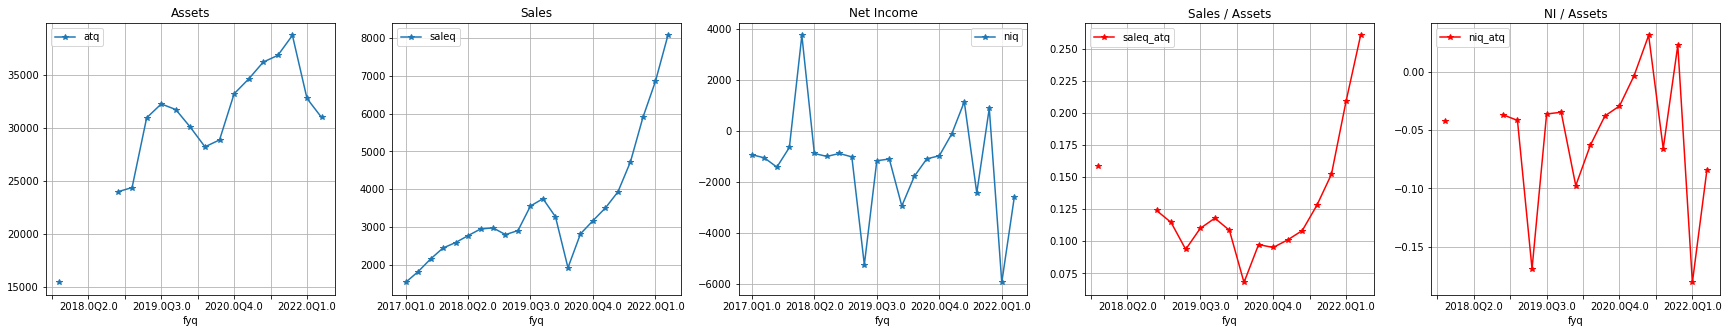

In [46]:
plt.rcParams["figure.figsize"] = (30,5)
fig, axes= plt.subplots(1,5)
dfq.plot(kind='line', grid= True, marker='*', x='fyq', y='atq', title= 'Assets', ax= axes[0])
dfq.plot(kind='line', grid= True, marker='*', x='fyq', y='saleq', title= 'Sales', ax= axes[1])
dfq.plot(kind='line', grid= True, marker='*', x='fyq', y='niq', title= 'Net Income', ax= axes[2])
dfq.plot(kind='line', grid= True, marker='*', x='fyq', y='saleq_atq', title= 'Sales / Assets', ax= axes[3], color= 'red')
dfq.plot(kind='line', grid= True, marker='*', x='fyq', y='niq_atq', title= 'NI / Assets', ax= axes[4], color= 'red')

plt.show()

------